Asma EL HAFIANE , Elisa DROUOT


Ce second notebook représente une évaluation de notre modèle CNN. Nous avons créé un nouveau répertoire appelé "Images" dans lequel nous avons placé 30 images appartenant à différentes classes : basket, eye, binoculars, rabbit, hand. L'objectif est d'utiliser le modèle CNN que nous avons enregistré dans le premier notebook et de l'appliquer sur les images du répertoire "Images" afin de vérifier les résultats de la classification.

Le processus se déroule comme suit : nous téléchargeons le modèle CNN enregistré, puis nous l'appliquons sur les images du dossier "Images". Le résultat de la classification pour chaque image sera enregistré dans un fichier CSV. Ce fichier CSV contiendra le nom de l'image traitée, sa classe réelle, et la classe prédite par notre modèle.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/DL"
img_shape = (28, 28, 3)
img_size = img_shape[:2]

In [ ]:
# Importation du module os pour interagir avec le système d'exploitation (gestion des fichiers et répertoires)
import os

# Importation de fonctions spécifiques de Keras pour le prétraitement des images
from keras.preprocessing.image import load_img, img_to_array

# Fonction pour charger des images et leurs étiquettes à partir d'un chemin donné
def load_images_and_labels(img_size, path):
    # Initialisation des listes pour stocker les images, noms d'images et étiquettes
    images = []
    image_names = []
    labels = []

    # Liste des noms des fichiers dans le répertoire spécifié
    list_images = os.listdir(path)

    # Boucle à travers chaque image dans le répertoire
    for img in list_images:
        # Ajout du nom de l'image à la liste
        image_names.append(img)

        # Recherche du premier souligné (_) dans le nom de l'image pour délimiter la classe
        f = img.find('_')
        label = img[:f]

        # Ajout de la classe à la liste des étiquettes
        labels.append(label)

        # Construction du chemin complet de l'image
        img_path = os.path.join(path, img)

        # Chargement de l'image avec redimensionnement à la taille spécifiée
        img_ = load_img(img_path, target_size=img_size)

        # Conversion de l'image en tableau numpy
        img_array = img_to_array(img_)

        # Ajout du tableau d'image à la liste des images
        images.append(img_array)

    # Retourne les listes d'images, noms d'images et étiquettes
    return images, image_names, labels


In [ ]:
# Chargement des données à partir de la fonction get_data
images, image_names, labels = load_images_and_labels(img_size=img_size, path=path)

# Conversion des images en un tableau NumPy et normalisation
X_data = np.array(images) / 255

# Affichage des dimensions du tableau
print('Test shapes :', X_data.shape)

# Utilisation des variables renommées
x, nom_img, y = X_data, image_names, labels

Test shapes : (30, 28, 28, 3)


1/1 [==============================] - 0s 218ms/step


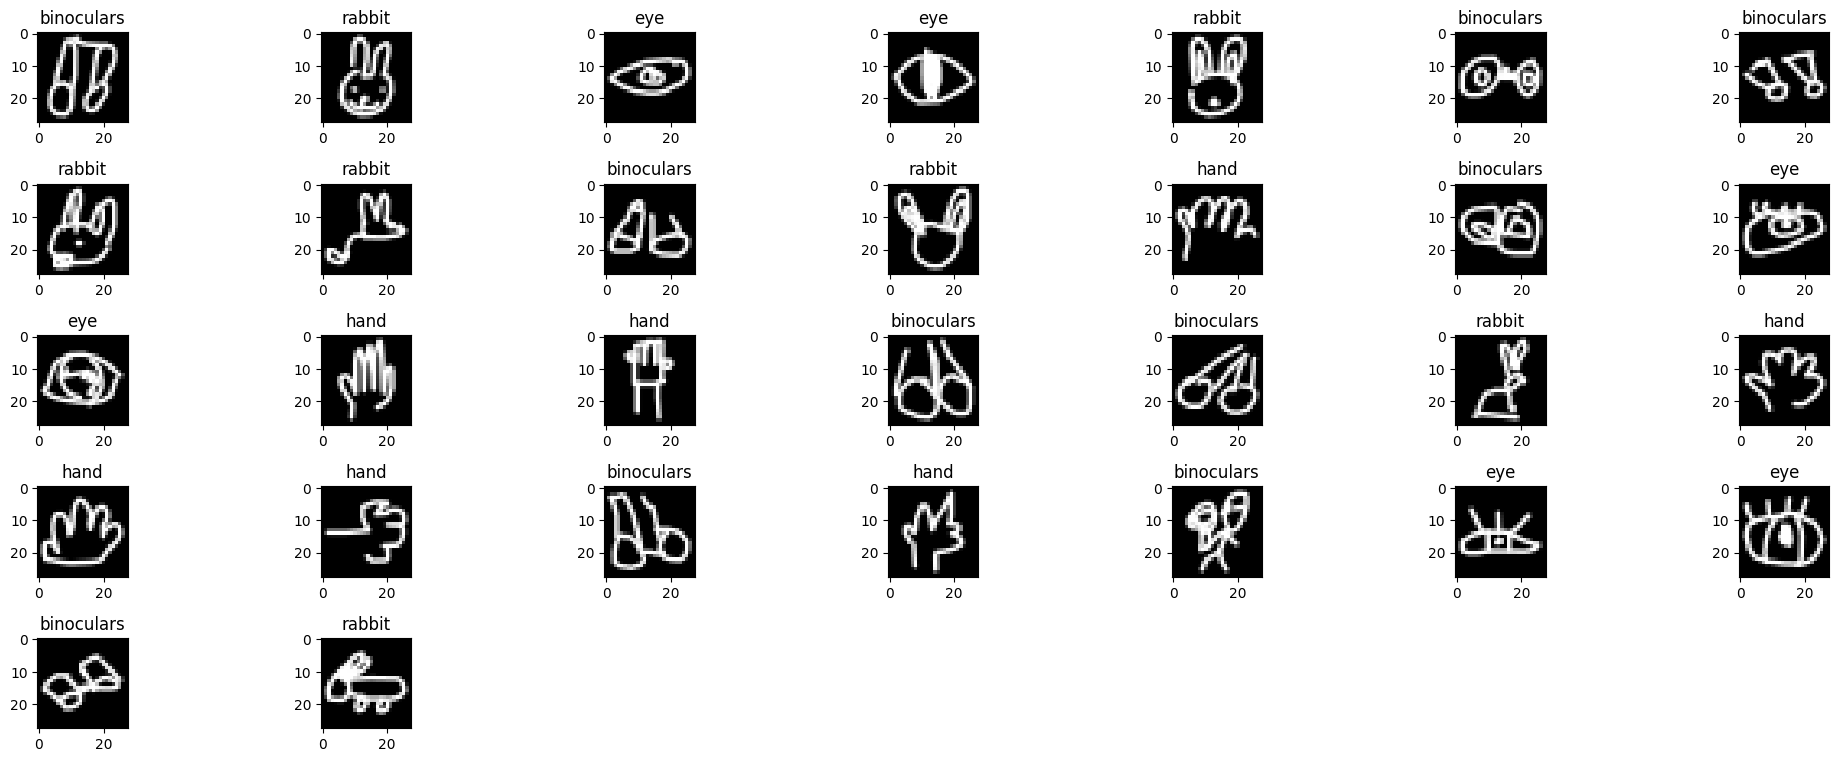

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import array_to_img

# Chargement du modèle
num_classes = 5
model = load_model('/content/drive/My Drive/Challenge_DL.h5')
classes = ["basket", "eye", "binoculars", "rabbit", "hand"]
image, label = x, y

# Prédictions du modèle
predicted_classes = model.predict(image)
predicted_ids = [np.argmax(predicted_classes[i]) for i in range(len(image))]
predicted_classes = np.array([classes[id] for id in predicted_ids])

# Création du fichier CSV
entetes = [u'Image', u'classe_predictee', u'classe_correcte']
with open('/content/drive/My Drive/Resultats_test.csv', 'w') as f:
    ligneEntete = ";".join(entetes) + "\n"
    f.write(ligneEntete)

    plt.figure(figsize=(20, 9))
    for n in range(len(image)):
        if predicted_classes[n] == label[n]:
            title = predicted_classes[n]
            color = "black"
        else:
            color = "red"
            title = f"{predicted_classes[n]}, correct:{label[n]}"

        ax = plt.subplot(6, 7, n + 1)
        fig = ax.imshow(array_to_img(image[n]))
        plt.title(title, color=color)

        # Remplissage du fichier CSV
        pre = predicted_classes[n].title()
        valeur = [nom_img[n], pre, y[n]]
        ligne = ";".join(map(str, valeur)) + "\n"
        f.write(ligne)

    plt.tight_layout()
    plt.show()
